# EDA & Visualisations 

### 1. Import Files
### 2. EDA & Descriptive Analysis
#### &nbsp; 2.1 Analyse Orders Day of Week
#### &nbsp; 2.2 Analyse Prices Distribution using Histogram
#### &nbsp; 2.3 Analyse Prices vs Orders day of the week
#### &nbsp; 2.4 Analyse Order Hour of Day
#### &nbsp; 2.5 Analyse Customer Loyalty Types
#### &nbsp; 2.6 Analyse Order Hours of Day vs Prices
#### &nbsp; 2.7 Age vs Dependents

In [2]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl

## 1. Import Files

In [3]:
# import the orders_prod_customers_left.pkl
path = r'/Users/patel/Documents/CF-Data Anaylst Course/Achievement-4/Instacart Basket Analysis-Oct 2023/'

df_ords_customers = pd.read_pickle(os.path.join(path, '02 Data/Prepared Data/ords_prods_customers.pkl'))
df_ords_customers.shape

(32404859, 32)

In [4]:
df_ords_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   order_id                    object        
 1   user_id                     object        
 2   number_of_orders            int8          
 3   orders_days_of_week         int8          
 4   order_hour_of_day           int8          
 5   days_since_prior_order      float32       
 6   product_id                  object        
 7   add_to_cart_order           int32         
 8   reordered                   int8          
 9   product_name                object        
 10  aisle_id                    int16         
 11  department_id               int8          
 12  prices                      float32       
 13  price_range_loc             object        
 14  busiest_day                 object        
 15  busy_slow_days              object        
 16  busiest_hours   

## 2. EDA & Descriptive Analysis

### 2.1 Analyse Orders Day of Week

In [5]:
# count rows for each day of the week
df_ords_customers['orders_days_of_week'].value_counts()

orders_days_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

#### 2.11 Distribution bar graph

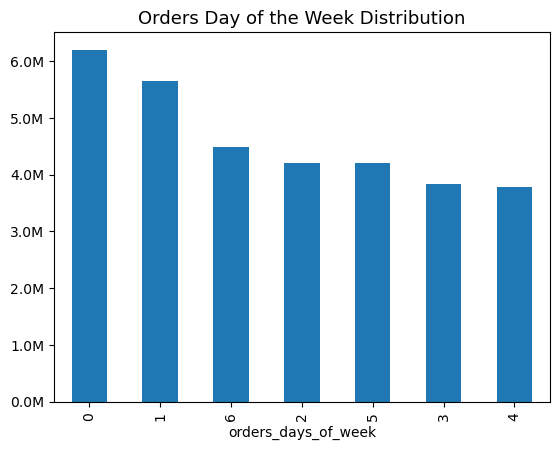

In [6]:
# plot a bar chart on orders_days_of_week value counts to see the distribution. Sorted by largest to smallest
plt.title('Orders Day of the Week Distribution', fontsize=13)
ax=df_ords_customers['orders_days_of_week'].value_counts().plot.bar()

#formats y-axis as M (millions)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.1f')+'M'))

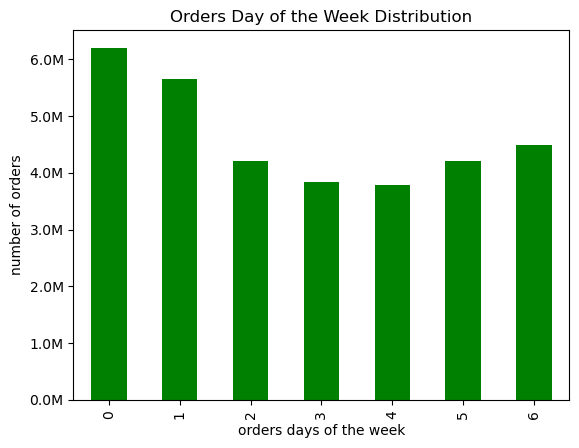

In [45]:
# bar chart of orders_days_of_week distribution sorted by orders_days_of_week

#formats y-axis as M (millions)
plt.title('Orders Day of the Week Distribution')
bar_odow = df_ords_customers['orders_days_of_week'].value_counts().sort_index().plot.bar(color=['green'], 
                                                    xlabel='orders days of the week', ylabel='number of orders')
bar_odow.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'.1f')+'M'))


#### 2.12 Export the bar graph

In [40]:
bar_odow.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_orders_dow.png'))

### 2.2 Analyse Prices Distribution using Histogram

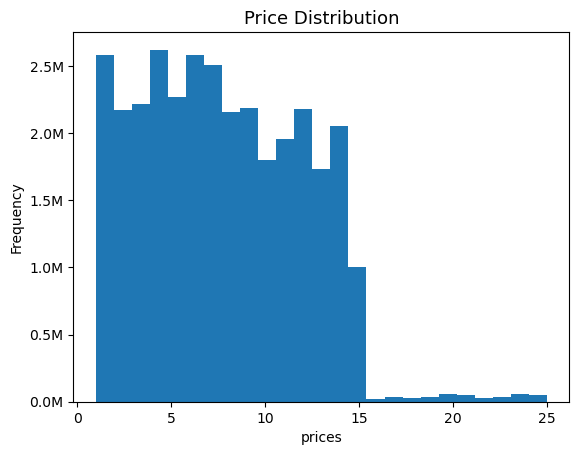

In [44]:
# historgram of prices using 25 bins
plt.title('Price Distribution', fontsize=13)
bar_prices = df_ords_customers['prices'].plot.hist(bins=25, xlabel='prices')
bar_prices.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000, '.1f')+'M'))

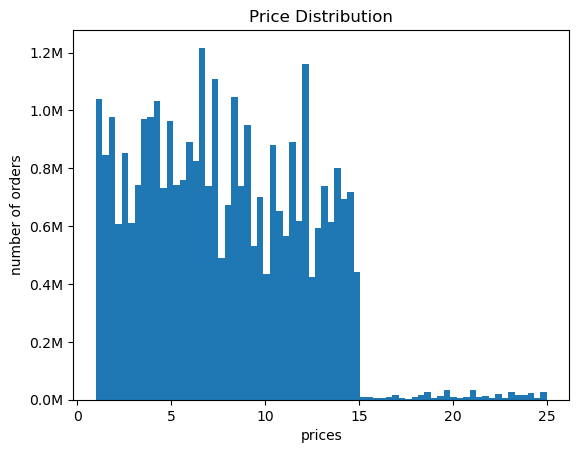

In [48]:
# historgram of prices using 70 bins
bar_prices = df_ords_customers['prices'].plot.hist(bins=70, xlabel='prices', ylabel="number of orders")
plt.title('Price Distribution')
bar_prices.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000, '.1f')+'M'))

#### Export the histogram

In [49]:
bar_prices.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/prices_hist.png'))

### 2.3 Analyse Prices vs Orders day of the week

#### Split the dataframes to 70/30

In [12]:
# spliting dataframes into 70/30 by assigning 'True' to random number less than 0.7 and 'False' to more

#create the random seed so its replicable
np.random.seed(4)

#create a list of (True, False) values based on random assignment of values between 0-1 and is less than 0.7
dev = np.random.rand(len(df_ords_customers)) <= 0.7

In [13]:
# Stores 70% of data sample in big dataframe (<= 0.7)
big = df_ords_customers[dev]

In [14]:
# Stores 30% of data sample in small dataframe (> 0.7)
small = df_ords_customers[~dev]

In [15]:
# Checking the length of the dataframes
big_len = len(big)
small_len = len(small)

big_len + small_len

32404859

In [16]:
len(df_ords_customers)

32404859

#### Plot line chart of orders_days_of_week and prices

In [17]:
# To plot the graph, extracting orders_day_of_week and prices
df_2 = small[['orders_days_of_week', 'prices']]
df_2.head()

,orders_days_of_week,prices
0,2,9.0
2,3,8.6
3,4,4.0
6,3,10.3
10,3,4.7


/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

KeyboardInterrupt: 

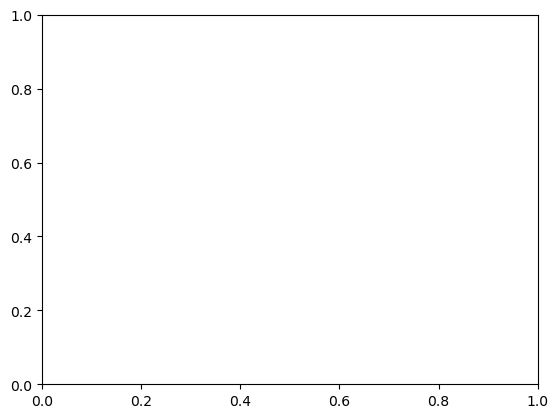

In [18]:
line = sns.lineplot(x='orders_days_of_week', y='prices', data=df_2)

In [ ]:
line.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/line_orders_days_vs_prices.png'))

In [19]:
#df_3 = big[['orders_days_of_week', 'prices']]
#line = sns.lineplot(x='orders_days_of_week', y='prices', data=df_3)

### 2.4 Analyse Order Hour of Day

In [20]:
df_ords_customers.head()

,order_id,user_id,number_of_orders,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_cust_type,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,2254736,1,4,4,7,29.0,25133,4,1,Organic String Cheese,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,473747,1,3,3,12,21.0,25133,4,0,Organic String Cheese,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,2550362,1,10,4,8,30.0,13032,8,1,Cinnamon Toast Crunch,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,550135,1,7,1,9,20.0,13032,5,1,Cinnamon Toast Crunch,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


In [21]:
df_ohoy = df_ords_customers[['order_hour_of_day']]

Text(0.5, 1.0, 'Orders by Hours')

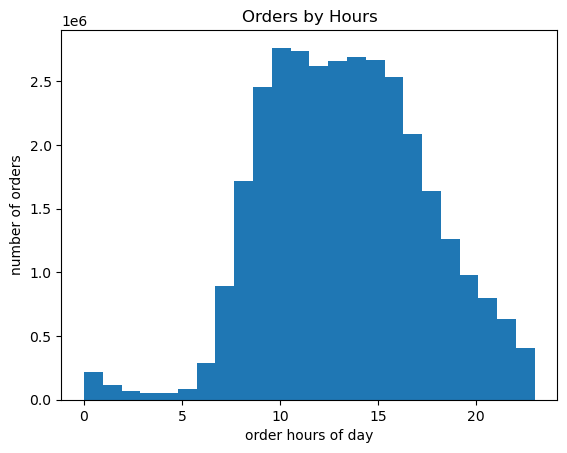

In [32]:
hist_ohoy = df_ohoy['order_hour_of_day'].plot.hist(bins=24, xlabel='order hours of day', ylabel='number of orders')
plt.title("Orders by Hours")

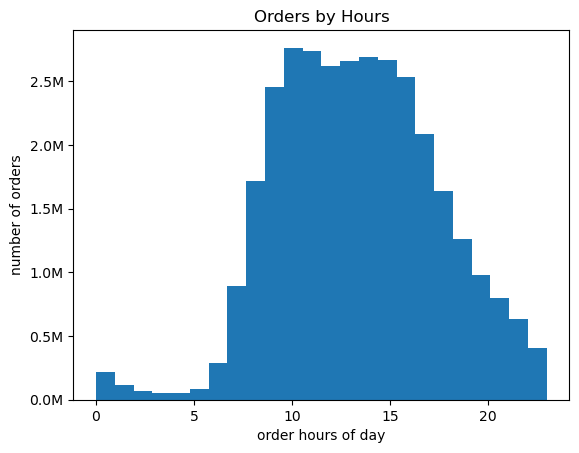

In [33]:
hist_ohoy = df_ohoy['order_hour_of_day'].plot.hist(bins=24, xlabel='order hours of day', ylabel='number of orders')
plt.title("Orders by Hours")

hist_ohoy.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000, '.1f')+'M'))

#### Export the histogram

In [34]:
hist_ohoy.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_orders_hours_distribution.png'))

#### Observations:

1. Peak hours for order is between 10am - 4pm
2. Most orders are made at 10am, 11am and 2pm
3. Off peak hours (minimum orders) are between 12am to 5am.

In [24]:
df_ohoy['order_hour_of_day'].value_counts()

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

###  2.5 Analyse Customer Loyalty Types

#### Distribution of customer loyalty type using bar graph

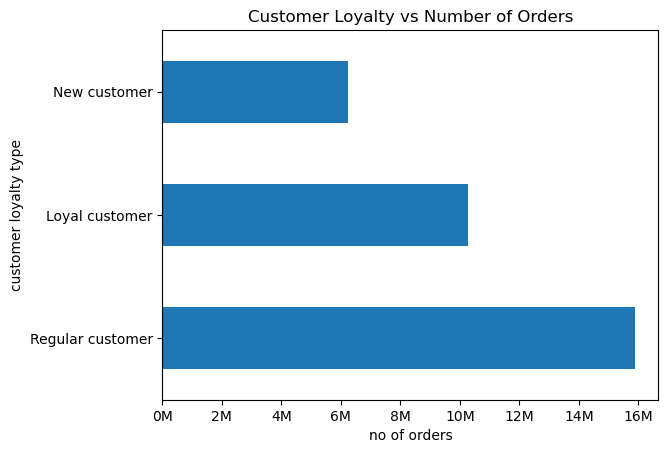

In [57]:
# horizontal bar graph loyalty flag vs count of orders per loyalty flag
bar_loyal = df_ords_customers['loyalty_flag'].value_counts().plot.barh(ylabel="customer loyalty type", 
                                                    xlabel="no of orders")

plt.title("Customer Loyalty vs Number of Orders")
bar_loyal.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'0.0f')+'M'))

#### Export the bar graph

In [58]:
bar_loyal.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_loyalty_flag_distribution.png'), bbox_inches = 'tight')

In [27]:
# checking the order count of loyalty flags
df_ords_customers['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

In [28]:
# calculating percentages of each customer loytalty type
print("Regular Customer: " + str((15876776 / (15876776+10284093+6243990)*100)) + "%")
print("Loyal Customer: " + str((10284093 / (15876776+10284093+6243990)*100)) + "%")
print("New Customer: " + str((6243990 / (15876776+10284093+6243990)*100)) + "%")

Regular Customer: 48.995047316823694%
Loyal Customer: 31.736268317044676%
New Customer: 19.268684366131637%


#### Observations:

1. Regular customers made most orders (49%)
2. New customers made the least orders (19%)
3. Loyalty customers madde 32% of orders


### 2.6 Analyse Order Hours of Day vs Prices

#### Extract order_hour_of_day and prices from sample "small" df

In [29]:
# extracting relevant columns and checking the dataframe
df_small_ohod_prices = small[['order_hour_of_day', 'prices']]
df_small_ohod_prices.head()

,order_hour_of_day,prices
0,8,9.0
2,12,8.6
3,8,4.0
6,7,10.3
10,7,4.7


#### Line graph: order_hour_of_day vs prices

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

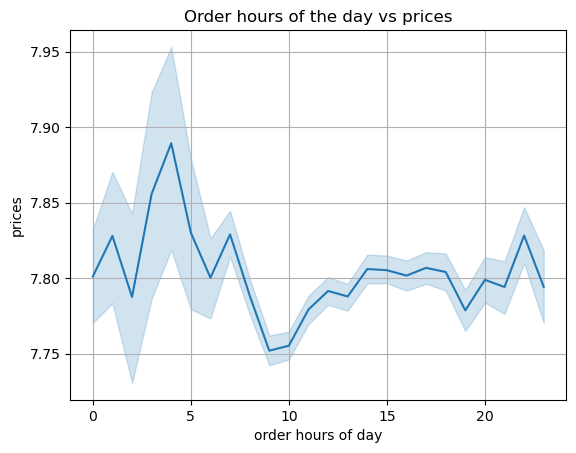

In [30]:
# Create a line graph to check correlation between order hours and prices
line_ohod_prices = sns.lineplot(data=df_small_ohod_prices, x='order_hour_of_day', y='prices')
line_ohod_prices.set(xlabel='order hours of day')
plt.title('Order hours of the day vs prices')
plt.grid()

In [31]:
line_ohod_prices.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/line_order_hours_vs_prices.png'))

#### Observations: 

1. Expenses are highest at 4am
2. Overall expenses are higher betwwen 10pm and 7am, with peaks at 10pm, 1am, 4am and 7am

### 2.7 Age vs Dependents

#### Extract age and depenandants

In [32]:
# Extract age and depenandants into a dataframe
df_age_dependants = df_ords_customers[['age','n_dependants']]

In [33]:
df_age_dependants.head()

,age,n_dependants
0,31,3
1,31,3
2,31,3
3,31,3
4,31,3


#### Line Graph : Age vs No of Dependants

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

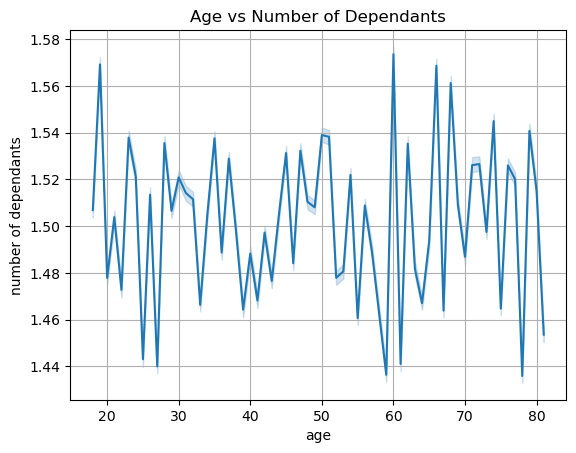

In [34]:
# create a line graph using seaborn to check for correlation
line_age_ndependants = sns.lineplot(data=df_age_dependants, x='age', y='n_dependants')
line_age_ndependants.set(xlabel='age', ylabel='number of dependants')
plt.title('Age vs Number of Dependants')
plt.grid()

#### Export line graph

In [35]:
line_age_ndependants.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/line_age_ndependants.png'))

#### Insight: 

There is no correlation between age and number of dependants

#### Number of customers by family status using bar graph

In [59]:
# extract fam_status and user_id into separate dataframe
df_fam_status_dependants = df_ords_customers[['fam_status','user_id']]
df_fam_status_dependants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   fam_status  object
 1   user_id     object
dtypes: object(2)
memory usage: 494.5+ MB


In [60]:
## Count unique users per fam_status
fam_users_no = df_fam_status_dependants.groupby(['fam_status'], as_index=False).agg({'user_id': 'nunique'})
fam_users_no

,fam_status,user_id
0,divorced/widowed,17640
1,living with parents and siblings,9701
2,married,144906
3,single,33962


/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


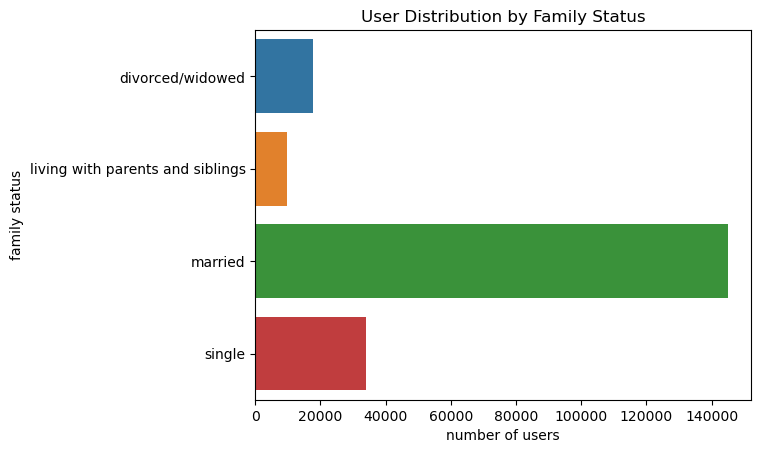

<Figure size 900x1100 with 0 Axes>

In [61]:
# Create a bar graph to show the user distribution based on family status
bar_fam_users = sns.barplot(y='fam_status', x='user_id', data=fam_users_no)
bar_fam_users.set(ylabel='family status', xlabel='number of users')
plt.title('User Distribution by Family Status')
fig = plt.figure(figsize=(9, 11))

#### Explort bar graph

In [62]:
bar_fam_users.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_fam_users.png'), bbox_inches = 'tight')

#### Insight: Significant number of users are married, followed by single

### 2.7 Age vs Income (Spending power)

#### Extract age and income 

In [40]:
# Extract age and income into a separate dataframe
df_age_income = df_ords_customers[['age', 'income']]
df_age_income.head()

,age,income
0,31,40423
1,31,40423
2,31,40423
3,31,40423
4,31,40423


#### Scatterplot: Age vs Income

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 0, 'age'), Text(0, 0.5, 'income')]

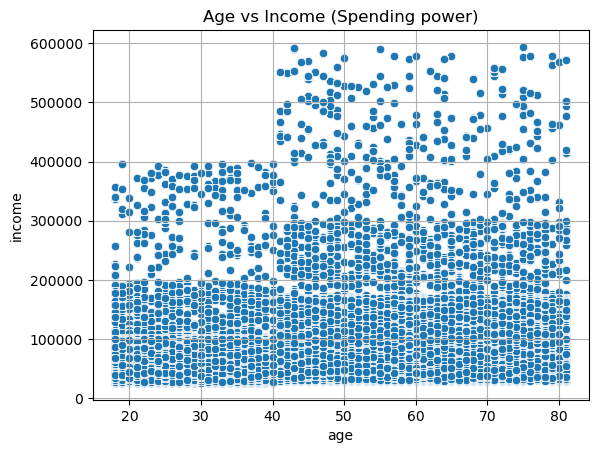

In [41]:
# Create a scatterplot to see the correlation between age and income
scatter_age_income = sns.scatterplot(x='age', y='income', data=df_age_income)
plt.grid()
plt.title('Age vs Income (Spending power)')
scatter_age_income.set(xlabel='age', ylabel='income')

#### Export scatterplot

In [42]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/scatter_age_income.png'))

#### Insights:

1. Ages between 18 to 40 have lower spending power compared to above 40
2. Customers between 18 and 40 have income less than 400,000. Larger subset of customers have less than 200,000
3. Customers above 40 surpass 400,000 and earn upto 600,000